# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities

['rikitea',
 'cape town',
 'hermanus',
 'bluff',
 'saskylakh',
 'mrirt',
 'nikolskoye',
 'ushuaia',
 'north myrtle beach',
 'kindu',
 'sochaczew',
 'gat',
 'faanui',
 'port alfred',
 'sibolga',
 'atuona',
 'mys shmidta',
 'mahebourg',
 'tuktoyaktuk',
 'chokurdakh',
 'wasilla',
 'bud',
 'north platte',
 'renqiu',
 'lebu',
 'hilo',
 'sitangkai',
 'kapaa',
 'bad sackingen',
 'florianopolis',
 'bathsheba',
 'huntington',
 'shkotovo-26',
 'talnakh',
 'kaitangata',
 'avarua',
 'ahome',
 'alice springs',
 'ambilobe',
 'hithadhoo',
 'colares',
 'castro',
 'punta arenas',
 'sonegaon',
 'nizhneyansk',
 'new norfolk',
 'sherghati',
 'kodiak',
 'half moon bay',
 'butaritari',
 'malwan',
 'kavieng',
 'galiwinku',
 'bulgan',
 'vestmanna',
 'yellowknife',
 'vila do maio',
 'mar del plata',
 'victoria',
 'mataura',
 'dinghai',
 'rio grande',
 'albany',
 'seoul',
 'busselton',
 'puerto ayora',
 'ponta do sol',
 'barrow',
 'arraial do cabo',
 'buchanan',
 'college',
 'soe',
 'lebedinyy',
 'parvatsar',
 

In [5]:
city_name = 'albany'
response = requests.get(query_url + city_name).json()
print(response)

{'coord': {'lon': -73.97, 'lat': 42.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.62, 'feels_like': 43.48, 'temp_min': 48, 'temp_max': 51.01, 'pressure': 1008, 'humidity': 64}, 'wind': {'speed': 6.26, 'deg': 306}, 'clouds': {'all': 100}, 'dt': 1588819442, 'sys': {'type': 3, 'id': 2009955, 'country': 'US', 'sunrise': 1588758202, 'sunset': 1588809691}, 'timezone': -14400, 'id': 5106841, 'name': 'Albany', 'cod': 200}


In [6]:
#arrays to be appended
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# start of the print
print("Beginning Data Retrieval")
print("-----------------------------")

# start counter
count = 0

for citi in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={citi}&units={units}"
    
    # Get weather data
    weather_json = requests.get(query_url).json()
    
    # increase count
    count += 1

    try:
        #print city name
        name = weather_json["name"]
        print(f"Processing Record {count} of {len(cities)}: {name}")
        
        #append arrays
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        
    except:
        print("City not found. Skipping...")
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 621: Rikitea
Processing Record 2 of 621: Cape Town
Processing Record 3 of 621: Hermanus
Processing Record 4 of 621: Bluff
Processing Record 5 of 621: Saskylakh
City not found. Skipping...
Processing Record 7 of 621: Nikolskoye
Processing Record 8 of 621: Ushuaia
Processing Record 9 of 621: North Myrtle Beach
Processing Record 10 of 621: Kindu
Processing Record 11 of 621: Sochaczew
Processing Record 12 of 621: Kiryat Gat
Processing Record 13 of 621: Faanui
Processing Record 14 of 621: Port Alfred
Processing Record 15 of 621: Sibolga
Processing Record 16 of 621: Atuona
City not found. Skipping...
Processing Record 18 of 621: Mahébourg
Processing Record 19 of 621: Tuktoyaktuk
Processing Record 20 of 621: Chokurdakh
Processing Record 21 of 621: Wasilla
Processing Record 22 of 621: Bud
Processing Record 23 of 621: North Platte
Processing Record 24 of 621: Renqiu
Processing Record 25 of 621: Lebu
Processing Record 

Processing Record 216 of 621: Mount Isa
Processing Record 217 of 621: Bosilegrad
Processing Record 218 of 621: Berbera
City not found. Skipping...
Processing Record 220 of 621: Uyskoye
Processing Record 221 of 621: Tateyama
Processing Record 222 of 621: Isangel
Processing Record 223 of 621: Laas
Processing Record 224 of 621: Leningradskiy
Processing Record 225 of 621: Benghazi
Processing Record 226 of 621: Santiago
Processing Record 227 of 621: Grand Gaube
Processing Record 228 of 621: Dudinka
Processing Record 229 of 621: Verkhoyansk
City not found. Skipping...
Processing Record 231 of 621: Kismayo
Processing Record 232 of 621: Port Hedland
Processing Record 233 of 621: Longyearbyen
Processing Record 234 of 621: Okha
Processing Record 235 of 621: Kiunga
Processing Record 236 of 621: Ola
Processing Record 237 of 621: Formosa
Processing Record 238 of 621: Talcahuano
Processing Record 239 of 621: Grão Mogol
City not found. Skipping...
Processing Record 241 of 621: San Cristobal
Processin

Processing Record 430 of 621: Al Bardīyah
Processing Record 431 of 621: Beringovskiy
Processing Record 432 of 621: Roskilde
Processing Record 433 of 621: Chara
Processing Record 434 of 621: Fukuechō
Processing Record 435 of 621: Manono
Processing Record 436 of 621: Tabou
Processing Record 437 of 621: Tari
City not found. Skipping...
City not found. Skipping...
Processing Record 440 of 621: Ust-Nera
Processing Record 441 of 621: Kavaratti
Processing Record 442 of 621: Sandpoint
Processing Record 443 of 621: Sestri Levante
Processing Record 444 of 621: Papillion
Processing Record 445 of 621: Irkutsk
Processing Record 446 of 621: Richards Bay
Processing Record 447 of 621: León
Processing Record 448 of 621: Rājgīr
Processing Record 449 of 621: Bonavista
Processing Record 450 of 621: Mandan
Processing Record 451 of 621: Daru
Processing Record 452 of 621: Abu Samrah
Processing Record 453 of 621: Prijepolje
Processing Record 454 of 621: Ōme
Processing Record 455 of 621: Atasū
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
from datetime import datetime
converted_date = []

for dt in date:
    converted_date.append(datetime.fromtimestamp(dt))
    

# read csv file
CWdf = pd.DataFrame({
    "City": city,
    "Country": country,
    "Date": converted_date,
    "Latitude": lat,
    "Longitude": lng,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
})

# save data frame as csv
CWdf.to_csv("../output_data/cities.csv", encoding='utf-8', index=False)

# view number of items per column
CWdf.count()

City               570
Country            570
Date               570
Latitude           570
Longitude          570
Cloudiness         570
Humidity           570
Max Temperature    570
Wind Speed         570
dtype: int64

In [9]:
CWdf

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Rikitea,PF,2020-05-06 22:48:01,-23.12,-134.97,78,66,74.84,12.19
1,Cape Town,ZA,2020-05-06 22:46:17,-33.93,18.42,29,93,59.00,3.36
2,Hermanus,ZA,2020-05-06 22:48:02,-34.42,19.23,37,78,61.79,9.19
3,Bluff,NZ,2020-05-06 22:48:02,-46.60,168.33,47,78,54.48,28.45
4,Saskylakh,RU,2020-05-06 22:48:02,71.92,114.08,74,93,5.94,7.56
...,...,...,...,...,...,...,...,...,...
565,Koubia,GN,2020-05-06 22:49:30,11.58,-11.90,85,61,76.08,3.15
566,Tupã,BR,2020-05-06 22:49:30,-21.93,-50.51,100,97,61.83,8.10
567,Ganzhou,CN,2020-05-06 22:49:30,28.82,115.43,91,81,78.21,1.36
568,Hikari,JP,2020-05-06 22:49:30,33.95,131.95,75,45,66.20,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

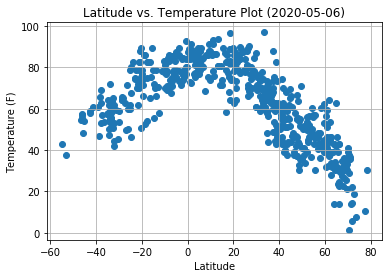

In [10]:
# Build a scatter plot for Latitiude vs Temperature
plt.scatter(CWdf["Latitude"], CWdf["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Temperature Plot ({datetime.now().date()})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsTemperature.png")

# Show plot
plt.show()

Graph Explanation
This graph shows the relationship between the Latitude vs. Max temperature for each city.
So, the closer you get yo the equation the warmer the temperature gets.

#### Latitude vs. Humidity Plot

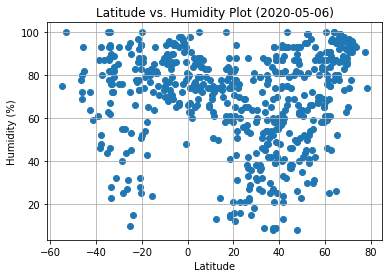

In [11]:
# Build a scatter plot for Latitiude vs Humidity
plt.scatter(CWdf["Latitude"], CWdf["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity Plot ({datetime.now().date()})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvsLat.png")

# Show plot
plt.show()

Graph Explanation
This graph shows the relationship between the Latitude vs the Humidity for each city. Since the data is
scattered all over the place, it shows that the Latitude does not have much affect over the Humidity.

#### Latitude vs. Cloudiness Plot

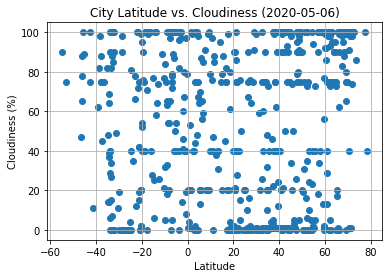

In [12]:
# Build a scatter plot for Latitiude vs Cloudiness
plt.scatter(CWdf["Latitude"], CWdf["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudvsLat.png")

# Show plot
plt.show()

Graph Explanation
This graph shows data points relationship between the City Latitude vs. Cloudiness for each city. Since this data is also 
very scattered, it shows that Latitude has no affect on the Cloudiness.

#### Latitude vs. Wind Speed Plot

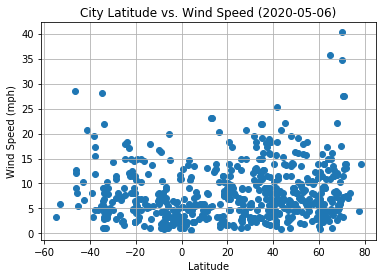

In [13]:
# Build a scatter plot for Latitiude vs Windspeed
plt.scatter(CWdf["Latitude"], CWdf["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindinessvsLat.png")

# Show plot
plt.show()

## Linear Regression

y = -0.31x +68.75
The r-squared is: -0.551874476847574


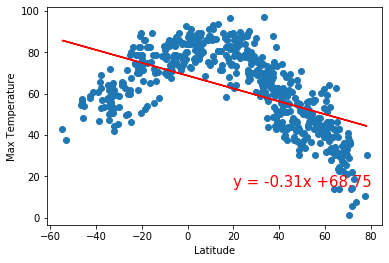

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
x_values = CWdf["Latitude"]
y_values = CWdf["Max Temperature"],

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames

northx_values = []
southx_values = []

# y axis for temp
northy_values = []
southy_values = []

# y axis for humidity
northhumidy_values = []
southhumidy_values = []

# y axis for cloudiness
northcloudsy_values = []
southcloudsy_values = []

# y axis for wind speed
northwindy_values = []
southwindy_values = []

# create index
indexes = range(0, len(CWdf["City"]))

# append arrays
for index in indexes:
    if CWdf["Latitude"][index] >= 0:
        northx_values.append(CWdf["Latitude"][index])
        northy_values.append(CWdf["Max Temperature"][index])
        northhumidy_values.append(CWdf["Humidity"][index])
        northcloudsy_values.append(CWdf["Cloudiness"][index])
        northwindy_values.append(CWdf["Wind Speed"][index])
    if CWdf["Latitude"][index] < 0:
        southx_values.append(CWdf["Latitude"][index])
        southy_values.append(CWdf["Max Temperature"][index])
        southhumidy_values.append(CWdf["Humidity"][index])
        southcloudsy_values.append(CWdf["Cloudiness"][index])
        southwindy_values.append(CWdf["Wind Speed"][index])
        
# convert all array values from float to integer
northx_values = np.array(northx_values, dtype = "int")
southx_values = np.array(southx_values, dtype = "int")
northy_values = np.array(northy_values, dtype = "int")
southy_values = np.array(southy_values, dtype = "int")
northhumidy_values = np.array(northhumidy_values, dtype = "int")
southhumidy_values = np.array(southhumidy_values, dtype = "int")
northcloudsy_values = np.array(northcloudsy_values, dtype = "int")
southcloudsy_values = np.array(southcloudsy_values, dtype = "int")
northwindy_values = np.array(northwindy_values, dtype = "int")
southwindy_values = np.array(southwindy_values, dtype = "int")

print(len(northx_values))
print(len(southx_values))

402
168


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.21261091806588533


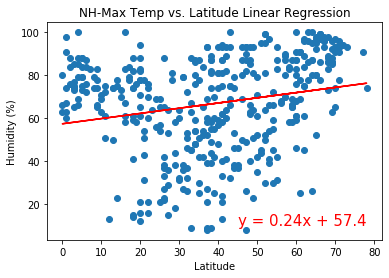

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_values, northhumidy_values)
regress_values = northx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northx_values, northhumidy_values)
plt.plot(northx_values,regress_values,"r-")  
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("NH-Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")
  
# save the figure
plt.savefig("NorthernTemperatureAcrossCities.png")
# show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.19530532358717412


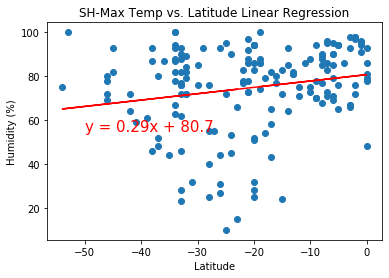

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_values, southhumidy_values)
regress_values = southx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southx_values, southhumidy_values)
plt.plot(southx_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("SH-Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("SouthernTemperatureAcrossCities.png")

# show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21261091806588533


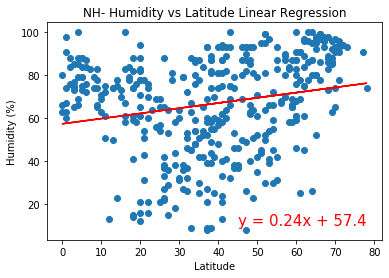

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_values, northhumidy_values)
regress_values = northx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northx_values, northhumidy_values)
plt.plot(northx_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("NH- Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("NHHumidity vs Latitude Linear Regression.png")

# show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19530532358717412


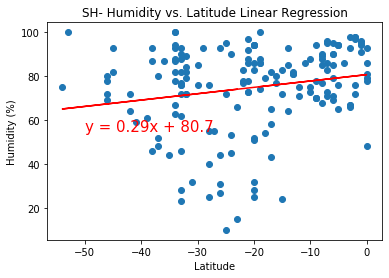

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_values, southhumidy_values)
regress_values = southx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southx_values, southhumidy_values)
plt.plot(southx_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("SH- Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("SH- Humidity vs Latitude Linear Regression")

# show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.26425146528363386


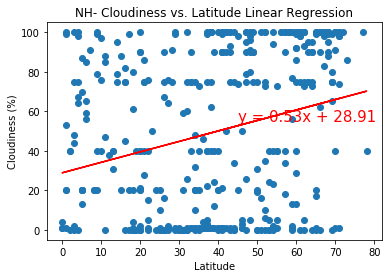

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_values, northcloudsy_values)
regress_values = northx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northx_values, northcloudsy_values)
plt.plot(northx_values,regress_values,"r-")
plt.annotate(line_eq,(45,55),fontsize=15,color="red")
plt.title("NH- Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("NorthernCloudinessAcrossCities.png")

# show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.034206959696938405


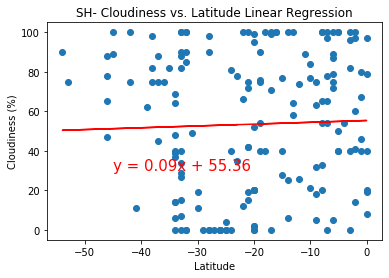

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_values, southcloudsy_values)
regress_values = southx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southx_values, southcloudsy_values)
plt.plot(southx_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.title("SH- Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("SouthernCloudinessvsLinearReg.png")

# show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1739805940703977


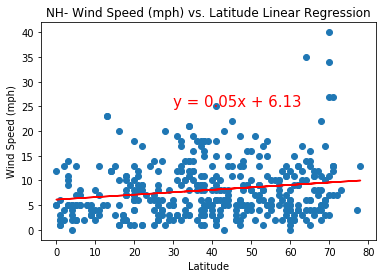

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_values, northwindy_values)
regress_values = northx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northx_values, northwindy_values)
plt.plot(northx_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("NH- Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("NHWindinessAcrossCities.png")

# show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23497292386040786


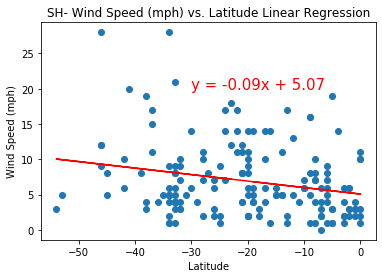

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_values, southwindy_values)
regress_values = southx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southx_values, southwindy_values)
plt.plot(southx_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.title("SH- Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("SHWindinessAcrossCities.png")

# show plot
plt.show()